<a href="https://colab.research.google.com/github/chrishamblin7/faccent/blob/master/API_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### setup (if on colab)

In [ ]:
!pip install faccent==1.0

#### quick start

In [25]:
from faccent import render, param, transform, objectives

In [26]:
#load model
import torch
from faccent.modelzoo import inceptionv1

DEVICE = 'cuda:0'
model = inceptionv1(pretrained=True)
_ = model.to(DEVICE).eval()
# MODEL_INPUT_SIZE = model.model_input_size
# MODEL_INPUT_RANGE = model.model_input_range
# IMG_SIZE = (512,512)


#labels for model
with open('./faccent/modelzoo/inceptionv1/inception_labels.txt', 'r') as f:
    category_targets= f.read().splitlines()


In [27]:
#image to accentuate
img_path = './test_images/iguana.jpg/'

#feature to accentuate (logit)
layer = 'softmax2_pre_activation_matmul'

#label = 'monarch'
label = 'loggerhead'
unit = category_targets.index(label)

initializing parameterization with ./test_images/iguana.jpg/
reg_layer arg set, but not reg_alpha, use reg_alpha=1
using parameterizer.standard_transforms
Initial loss: -5.080
obj/reg ratio: 0.10638943085005984
setting reg balance parameter to this ratio


  0%|          | 0/99 [00:00<?, ?it/s]

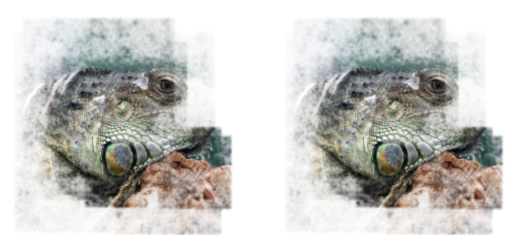

 10%|█         | 10/99 [00:01<00:16,  5.53it/s]

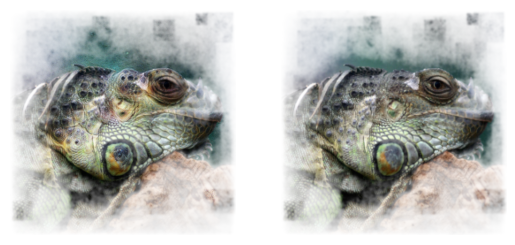

 20%|██        | 20/99 [00:03<00:14,  5.49it/s]

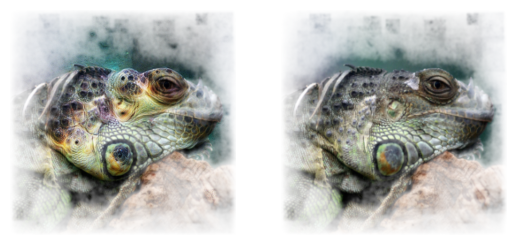

 30%|███       | 30/99 [00:06<00:12,  5.48it/s]

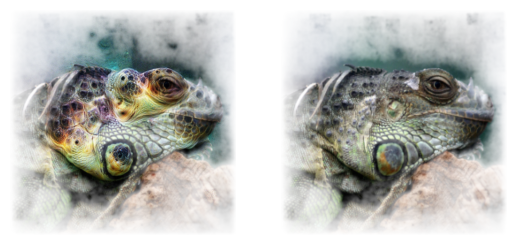

 40%|████      | 40/99 [00:08<00:10,  5.58it/s]

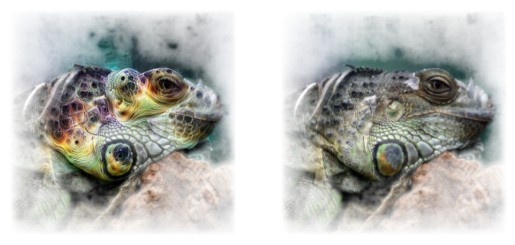

 51%|█████     | 50/99 [00:10<00:08,  5.59it/s]

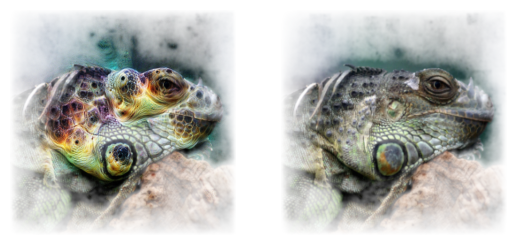

 61%|██████    | 60/99 [00:11<00:06,  5.58it/s]

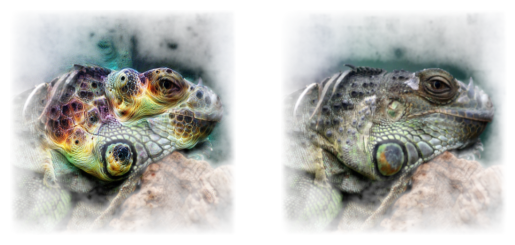

 71%|███████   | 70/99 [00:13<00:05,  5.54it/s]

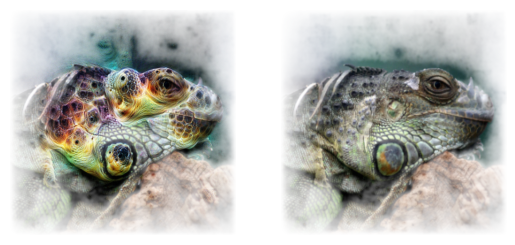

 81%|████████  | 80/99 [00:15<00:03,  5.44it/s]

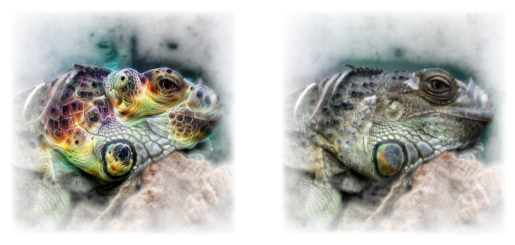

 91%|█████████ | 90/99 [00:17<00:01,  5.48it/s]

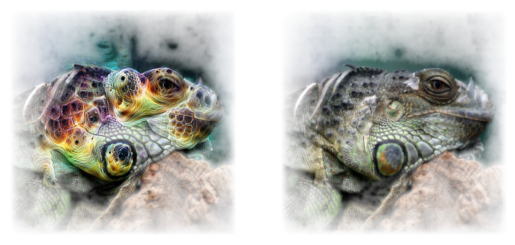

 99%|█████████▉| 98/99 [00:19<00:00,  5.37it/s]

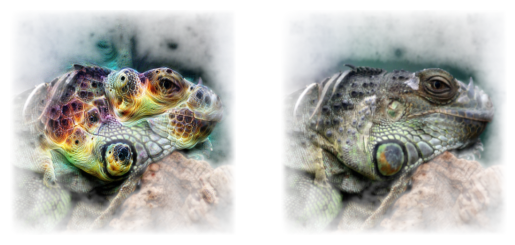

100%|██████████| 99/99 [00:20<00:00,  4.94it/s]


In [28]:
obj = layer+':'+str(unit)
imgs, img_trs, _, _ = render.render_vis(
                                    model,
                                    obj,
                                    init_img = img_path,
                                    accent_reg_layer = 'mixed3a'
                                  )

In [ ]:
#an interactive widget

from faccent.utils import accent_widget

accent_widget(imgs, img_trs)

#### normal (noise-seeded) feature visualization

no image specified, so intializing with random noise"
using parameterizer.standard_transforms


  0%|          | 0/99 [00:00<?, ?it/s]

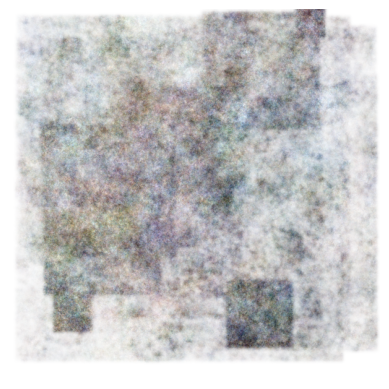

  9%|▉         | 9/99 [00:00<00:06, 13.61it/s]

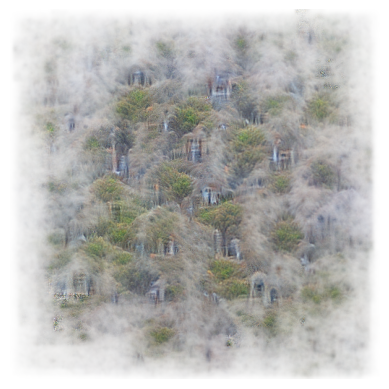

 19%|█▉        | 19/99 [00:01<00:05, 14.23it/s]

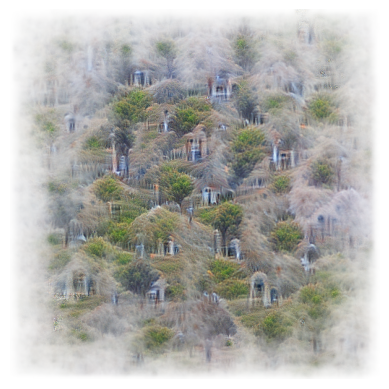

 29%|██▉       | 29/99 [00:02<00:04, 14.29it/s]

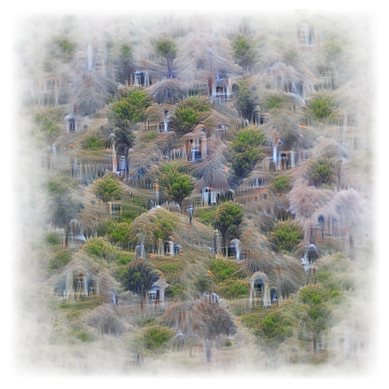

 39%|███▉      | 39/99 [00:03<00:04, 14.38it/s]

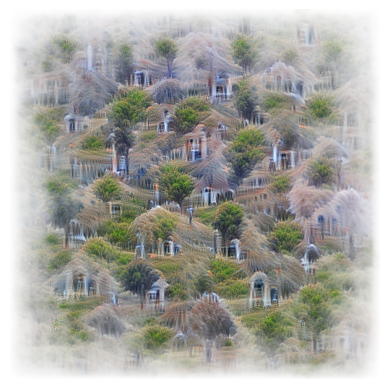

 49%|████▉     | 49/99 [00:04<00:03, 13.73it/s]

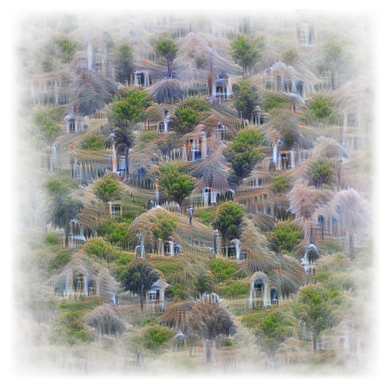

 60%|█████▉    | 59/99 [00:04<00:02, 14.36it/s]

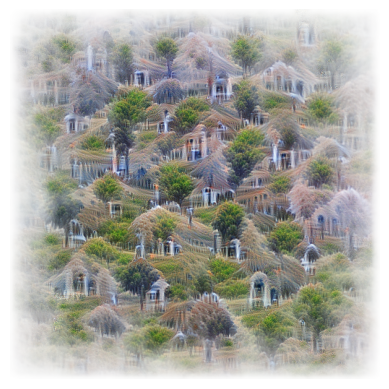

 70%|██████▉   | 69/99 [00:05<00:02, 14.36it/s]

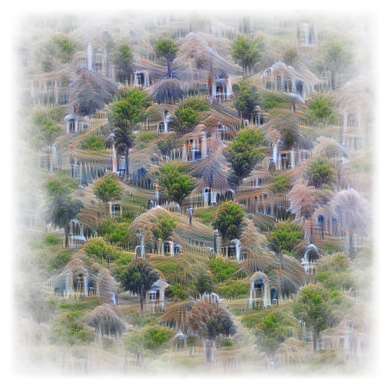

 80%|███████▉  | 79/99 [00:06<00:01, 14.17it/s]

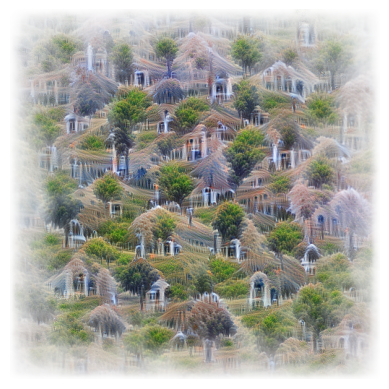

 90%|████████▉ | 89/99 [00:07<00:00, 14.30it/s]

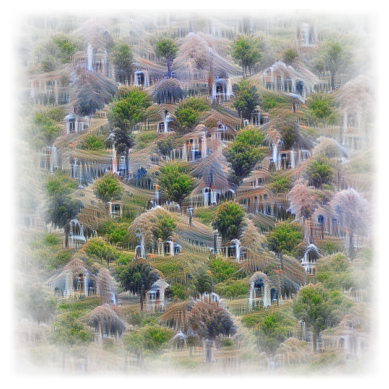

 98%|█████████▊| 97/99 [00:07<00:00, 13.74it/s]

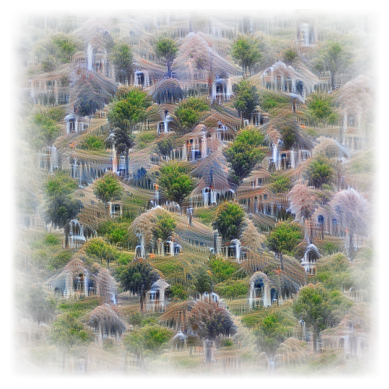

100%|██████████| 99/99 [00:08<00:00, 12.25it/s]


In [29]:
_ = render.render_vis(model, "mixed4a:475") 

#### latent accentuation

initializing parameterization with test_images/fox.jpg
using parameterizer.standard_transforms
Initial loss: -21.144
obj/reg ratio: 1.1608973334000992
setting reg balance parameter to this ratio


  0%|          | 0/99 [00:00<?, ?it/s]

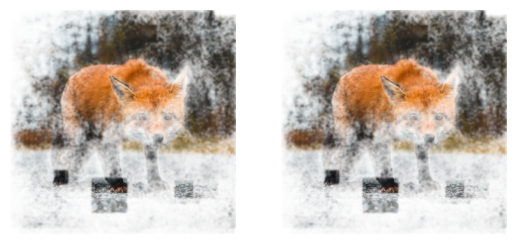

 10%|█         | 10/99 [00:01<00:12,  6.97it/s]

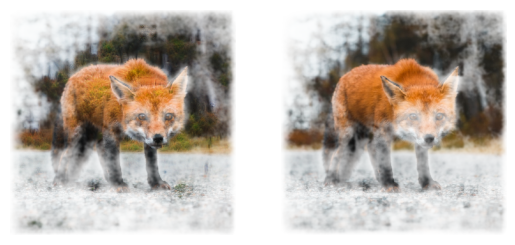

 20%|██        | 20/99 [00:03<00:11,  6.97it/s]

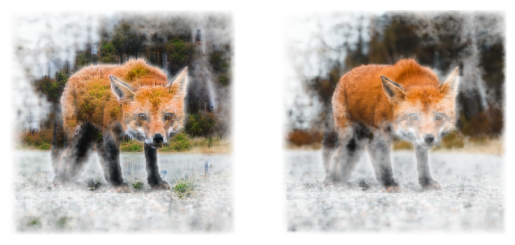

 30%|███       | 30/99 [00:04<00:09,  6.96it/s]

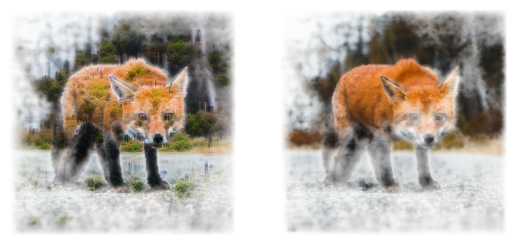

 40%|████      | 40/99 [00:06<00:08,  6.99it/s]

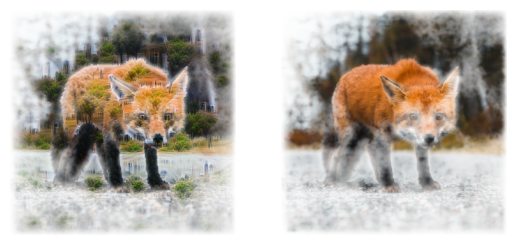

 51%|█████     | 50/99 [00:08<00:07,  6.94it/s]

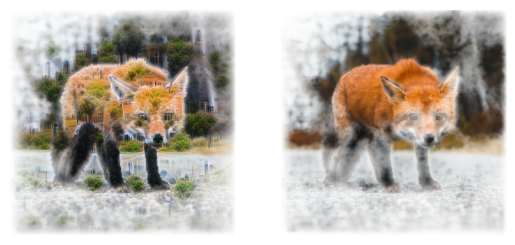

 61%|██████    | 60/99 [00:09<00:05,  6.87it/s]

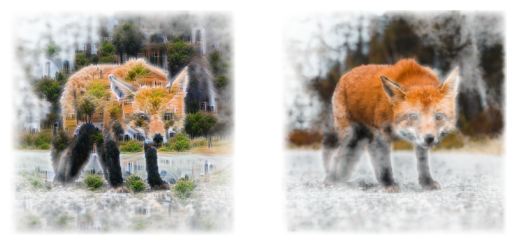

 71%|███████   | 70/99 [00:11<00:04,  6.94it/s]

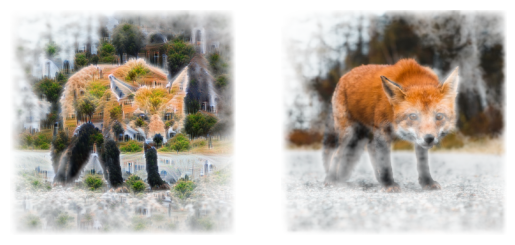

 81%|████████  | 80/99 [00:13<00:02,  6.94it/s]

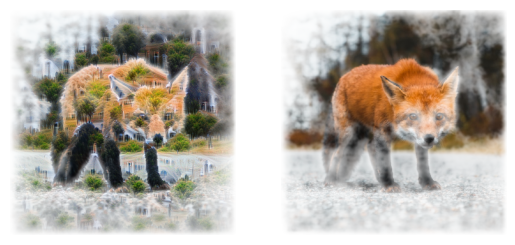

 91%|█████████ | 90/99 [00:14<00:01,  6.98it/s]

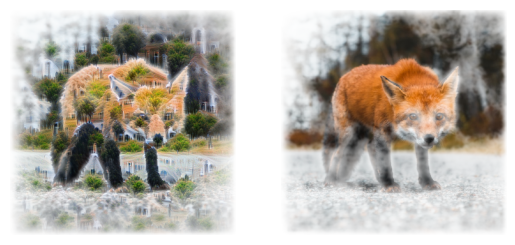

 99%|█████████▉| 98/99 [00:16<00:00,  6.82it/s]

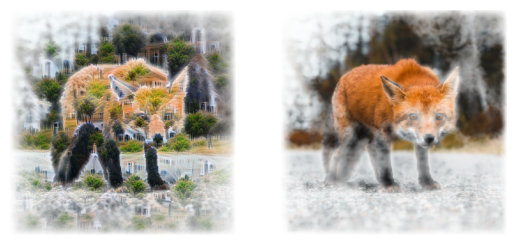

100%|██████████| 99/99 [00:16<00:00,  5.99it/s]


In [30]:
imgs, img_trs, _, _ = render.render_vis(model, 
                      "mixed4a:475",
                      init_img = 'test_images/fox.jpg',
                      accent_reg_layer = 'conv2d2',
                      accent_reg_alpha = 1.
                      )

### Finer control

#### no augmentations or parameterization

In [ ]:
#activation maximization only

#in what space do we parameterization the image? (this is where we measure gradients)
parameterizer = param.pixel(init_img='./test_images/iguana.jpg',
                            color_decorrelate=False,
                            device=DEVICE)

#what augmentation scheme do you apply?
transforms = [] #no augmentations

#objective what are you trying to maximize in the model?
layer = 'softmax2_pre_activation_matmul'
label = 'terrapin'
unit = category_targets.index(label)
obj = objectives.channel(layer,unit)


_ = render.render_vis(model,
                      obj,
                      parameterizer,
                      transforms = transforms,
                      out_thresholds = [150],
                      inline_thresholds = range(0,150,20),
                      trans_p=0)

#### fourier phase parameterization

In [ ]:
#fourier with decorrelated color space

#in what space do we parameterization the image? (this is where we measure gradients)
parameterizer = param.fourier_phase(init_img='./test_images/iguana.jpg',
                              device=DEVICE)

#what augmentation scheme do you apply?
transforms = [] #no augmentations

#objective what are you trying to maximize in the model?
obj = objectives.channel(layer,unit)


_ = render.render_vis(model,
                      obj,
                      parameterizer,
                      transforms = transforms,
                      out_thresholds = [150],
                      inline_thresholds = range(0,150,20),
                      trans_p=0)

#### augmentations

##### box crop transformations

In [ ]:
#in what space do we parameterization the image? (this is where we measure gradients)
parameterizer = param.fourier(init_img='./test_images/iguana.jpg',
                              device=DEVICE)

#what augmentation scheme do you apply?
transforms = [transform.box_crop_2(box_min_size=.05,
                                   box_max_size = .99),
              transform.resize((512,512))]
transform_f = transform.compose(transforms,nb_transforms=8)


transformed_images = transform_f(parameterizer.params_to_img())

from faccent.utils import show
show(transformed_images)

##### jitter transformations

In [ ]:
#in what space do we parameterization the image? (this is where we measure gradients)
parameterizer = param.fourier(init_img='./test_images/iguana.jpg',
                              device=DEVICE)

#what augmentation scheme do you apply?
transforms = transform.standard_jitter_transforms+[transform.resize((512,512))]
transform_f = transform.compose(transforms,nb_transforms=8)


transformed_images = transform_f(parameterizer.params_to_img())

from faccent.utils import show
show(transformed_images)

#### optimize with custom  parameterization, transforms, and regularization

In [ ]:
#in what space do we parameterization the image? (this is where we measure gradients)
parameterizer = param.fourier(init_img='./test_images/iguana.jpg',
                              device=DEVICE,
                              forward_init_img= True)  #for regularization

#what augmentation scheme do you apply?
transforms = [
              transform.box_crop_2(box_min_size=.05,
                                   box_max_size = .99),
              transform.uniform_gaussian_noise()
             ]


layer = 'softmax2_pre_activation_matmul'
label = 'whiptail'
unit = category_targets.index(label)

#objective what are you trying to maximize in the model?
obj1 = objectives.channel(layer,unit)    #maximization target
obj2 = objectives.l2_compare('mixed3a')           # regularization target
obj = obj1-.1*obj2


_ = render.render_vis(model,
                      obj,
                      parameterizer,
                      transforms = transforms,
                      out_thresholds = [150],
                      inline_thresholds = range(0,150,20),
                      trans_p=5)

#### neuron-wise visualization

In [ ]:
#in what space do we parameterization the image? (this is where we measure gradients)
parameterizer = param.fourier(init_img='./test_images/fox.jpg',
                              device=DEVICE,
                              forward_init_img= True)  #for regularization

#what augmentation scheme do you apply?
transforms = [
              transform.box_crop_2(box_min_size=.7,
                                   box_max_size = .99),
              transform.uniform_gaussian_noise()
             ]

obj1 = objectives.neuron('mixed4b',0) 
obj2 = objectives.l2_compare('mixed3a')     
obj = obj1-5*obj2


_ = render.render_vis(model,
                      obj,
                      parameterizer,
                      transforms = transforms,
                      out_thresholds = [150],
                      inline_thresholds = range(0,150,20),
                      trans_p=5,
                      img_tr_obj = obj1) # show transparency only with respect to maximization objective